# Data Science Project: Planning Stage (Individual Portion)

### Data Description:

A UBC research group is collecting data on how people play videogames. Below is a summary of the datasets:

##### Sessions Data: sessions.csv

Observations(rows):1535  
Variables(columns):5

##### Variable Information:
|Variable Name| Type    | Description|
|------------|----------|--------|
|hashedEmail |Character |Player's unique hashed anonymous email(same as players.csv)|
|start_time  |Character |Game session start for player (human-readable)|
|end_time    |Character |Game session end for player (human-readable)|
|original_start_time|Double |Original session start time (server time stamp)| 
|original_end_time|Double |Original session end time (server time stamp)|

##### Additional Details:
- No session duration included(must be computed).
- Date and time included in start/end times are not useable for computation currently and must be converted allow for the session time to be calculated.
- Inconsistancies due to time zone variations.
- Sessions may include missing or inconsistant data.
- Potential errors(mismatched/incorrect) in email imputs.

  
##### Player Data: players.csv

Observations(rows): 196  
Variables(columns): 7

##### Variable Information:
|Variable Name| Type    | Description|
|------------|----------|--------|
|experience  |Character |Player's self reported experience level(from ameteur to verteran)|
|subscribe   |Logical   |Whether the player subscribed to a game-related newsletter (True/False)|
|hashedEmail |Character |Player's unique hashed anonymous email|
|played_hours|Double    |Player's total hours in the game|
|name        |Character |Player's in game name|
|gender      |Character |Player self reported gender| 
|age         |Double    |Player age in years (no decimals)|

##### Additional Details:
- Experience level is self reported and may be biased resulting in inacurate representation. 
- Sampling bias may affect results(may not represent general population).
- Self reported variables may be biased. 
- Missing values may be present affecting analysis.
- Age and played_hours may have outliers causing the results to be skewed.


### Questions:  
##### Broad question:  
What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?  

##### Specific question:  
Can a players total playtime(played_hours), experience level (experience), number of sessions(number_of_sessions), and mean session length(mean_session_length_mins) predict whether they will subscribe to the game-related newsletter(subscribe)?  

### Exploratory Data Analysis:

In [110]:
# Loading Libraries
library(tidyverse)
library(tidymodels)
library(dplyr)
library(ggplot2)
library(RColorBrewer)
library(repr)
library(lubridate)
library(readr)

#limiting dataframe outputs to 6 rows
options(repr.matrix.max.rows = 6)

In [2]:
#Load the Data

players<- read_csv(
        "https://raw.githubusercontent.com/ajones200/dsci100_individual/refs/heads/main/players.csv") 
players

sessions<- read_csv(
        "https://raw.githubusercontent.com/ajones200/dsci100_individual/refs/heads/main/sessions.csv")
sessions

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


In [8]:
#View Players Dataset information
cat("Players Dataset:\n","Rows:", nrow(players),"\n","Columns:", ncol(players))
cat("\n")
cat("\nPlayers Dataset Variable types:\n")
sapply(players, typeof)

#Check number of missing/NA variables
cat("\nPlayers dataset missing variables:\n") 
    print(colSums(is.na(players)))

#Look at all unique outcomes for the quatitative variables with limited results (gender and experience)
#These are self assigned variables
cat("Possible unique outcomes for some catagorical variables\n")
players|>
select(experience, gender)|>
map(unique)

Players Dataset:
 Rows: 196 
 Columns: 7

Players Dataset Variable types:


experience    subscribe  hashedEmail played_hours         name       gender 
 "character"    "logical"  "character"     "double"  "character"  "character" 
         Age 
    "double"


Players dataset missing variables:
  experience    subscribe  hashedEmail played_hours         name       gender 
           0            0            0            0            0            0 
         Age 
           2 
Possible unique outcomes for some catagorical variables


$experience
[1] "Pro"      "Veteran"  "Amateur"  "Regular"  "Beginner"

$gender
[1] "Male"              "Female"            "Non-binary"       
[4] "Prefer not to say" "Agender"           "Two-Spirited"     
[7] "Other"

In [102]:
#View Sessions Dataset information
cat("Sessions Dataset:\n","Rows:", nrow(sessions),"\n","Columns:", ncol(sessions))
cat("\n")
cat("\nSessions Dataset Variable types:\n")
sapply(sessions, typeof)

#Check number of missing variables
cat("\nSessions Dataset missing Variables:\n") 
    print(colSums(is.na(sessions)))

Sessions Dataset:
 Rows: 1535 
 Columns: 5

Sessions Dataset Variable types:


hashedEmail          start_time            end_time original_start_time 
        "character"         "character"         "character"            "double" 
  original_end_time 
           "double"


Sessions Dataset missing Variables:
        hashedEmail          start_time            end_time original_start_time 
                  0                   0                   2                   0 
  original_end_time 
                  2 


In [103]:
#Calculate the mean of each quantitative variable from the players dataset
cat("Mean of Quantitative Variables in Players Dataset:\n")

numeric_players<- players[sapply(players, is.numeric)]

players_table_mean<-colMeans(numeric_players, na.rm= TRUE)
    
players_table_mean

Mean of Quantitative Variables in Players Dataset:


played_hours          Age 
    5.845918    21.139175

In [104]:
#Data Wrangling
#Remove NA values from the datasets
players_clean<- na.omit(players)
sessions_clean<- na.omit(sessions)

#convert start and end times (character strings) to an object that can be used to compute the duration of each session in minutes.
sessions_time_mutate<- sessions_clean|>
    mutate(
        start= dmy_hm(start_time, tz = "UTC"), 
        end= dmy_hm(end_time, tz = "UTC"),
        duration_mins = as.numeric(difftime(end, start, units= "mins")))
#When wanting to use the mean session length for computation must probably convert to hours, standardize or change the hours_played to minutes.

#calculate mean session time and number of sessions
sessions_organized<- sessions_time_mutate|>
    group_by(hashedEmail)|>
    summarize(
        number_of_sessions = n(),
        mean_session_length_mins = mean (duration_mins, na.rm=TRUE),
        )

In [105]:
# Merge the datasets
players_merged<- players_clean|>
    left_join(sessions_organized, by = "hashedEmail")|>
    filter(!is.na(number_of_sessions), !is.na(mean_session_length_mins))
#Remove any NA values(players who had no sessions or time played)

#Select only needed columns for final dataset
#Include mean_session_length, played_hours, number_of_sessions, experience
players_final_data<- players_merged|>
select(mean_session_length_mins, played_hours, number_of_sessions, experience, subscribe)
players_final_data 

mean_session_length_mins,played_hours,number_of_sessions,experience,subscribe
<dbl>,<dbl>,<int>,<chr>,<lgl>
74.77778,30.3,27,Pro,TRUE
85.00000,3.8,3,Veteran,TRUE
5.00000,0.0,1,Veteran,FALSE
⋮,⋮,⋮,⋮,⋮
21.00000,0.3,1,Veteran,FALSE
5.00000,0.0,1,Amateur,FALSE
29.83333,2.3,6,Amateur,FALSE


### Visualizations

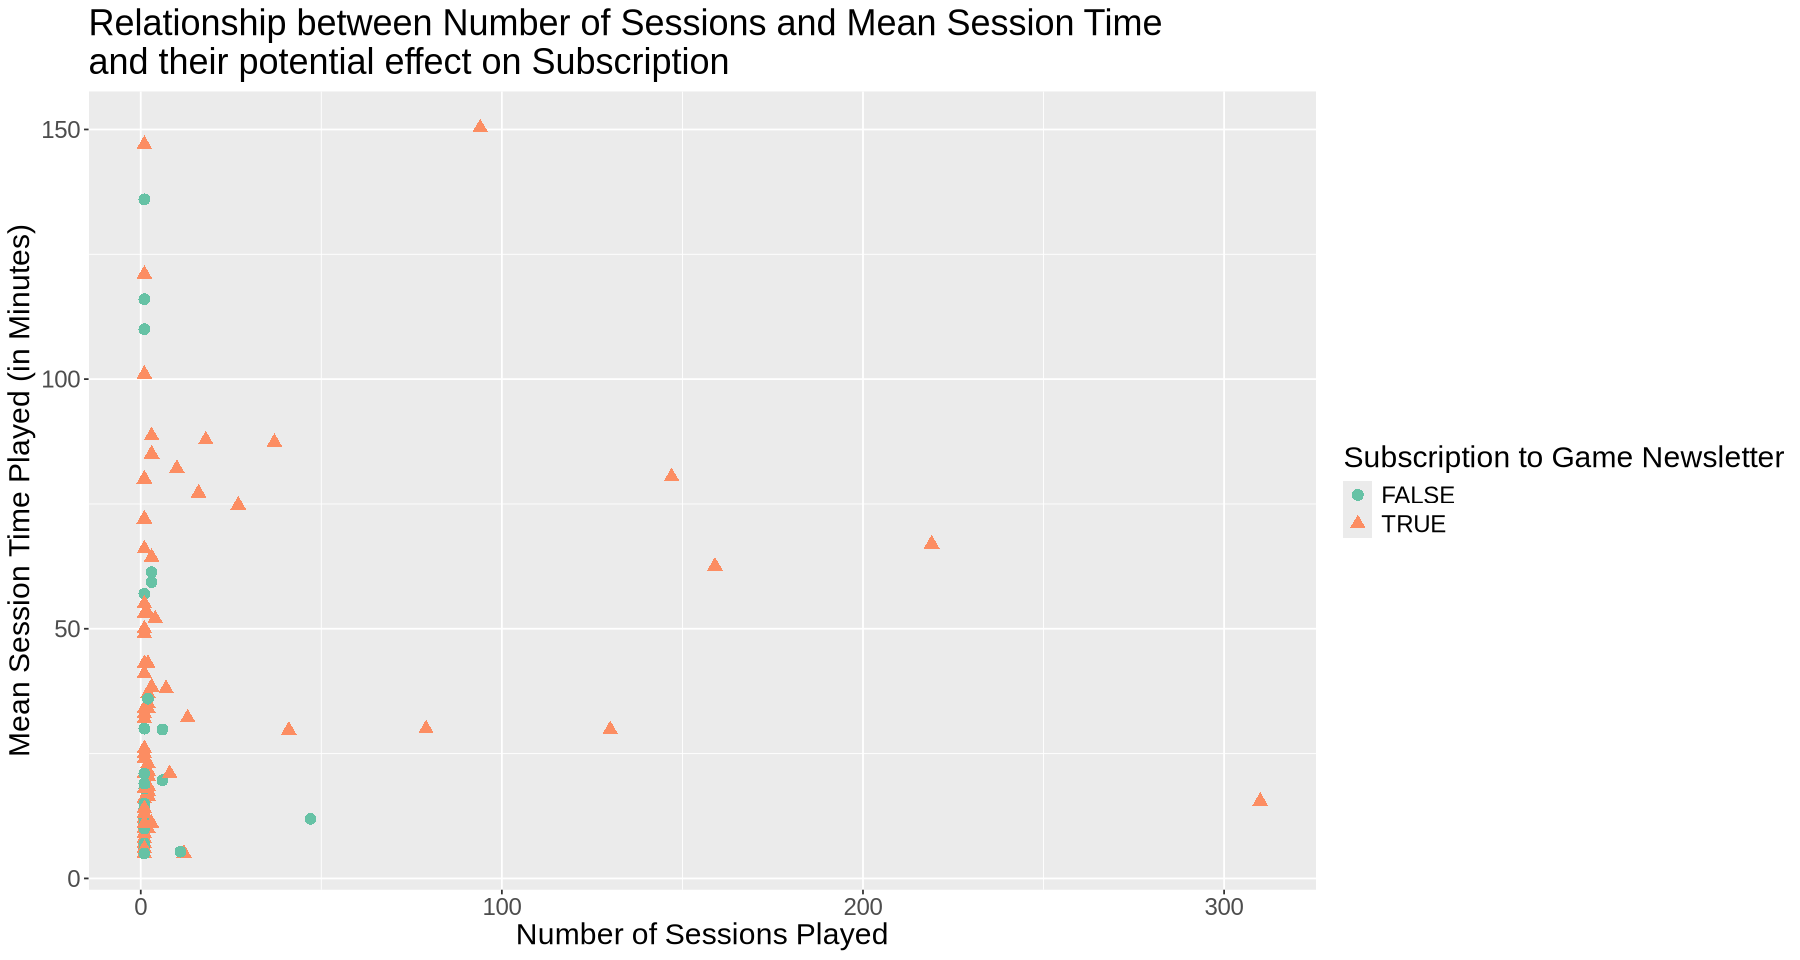

In [106]:
#Scatterplot showing the relationships between the number of sessions, mean session time and subscription. 
options(repr.plot.width = 15, repr.plot.height = 8)
Scatterplot1<- players_final_data|>
ggplot(aes(x= number_of_sessions, y= mean_session_length_mins, color= subscribe, shape=subscribe))+
    geom_point(size=3)+ 
    labs(x= "Number of Sessions Played", 
         y= "Mean Session Time Played (in Minutes)", 
         title = "Relationship between Number of Sessions and Mean Session Time \nand their potential effect on Subscription",
         color="Subscription to Game Newsletter",
         shape="Subscription to Game Newsletter")+
    scale_color_brewer(palette = "Set2")+
    theme(text = element_text(size = 18))

Scatterplot1

Most players have short sessions and play relatively few times. Players who have more sessions appear to have shorter session times. There does not seem to be a clear relationship between session times and subscriptions but as the players number of sessions increases they seem less likely to subscribe.

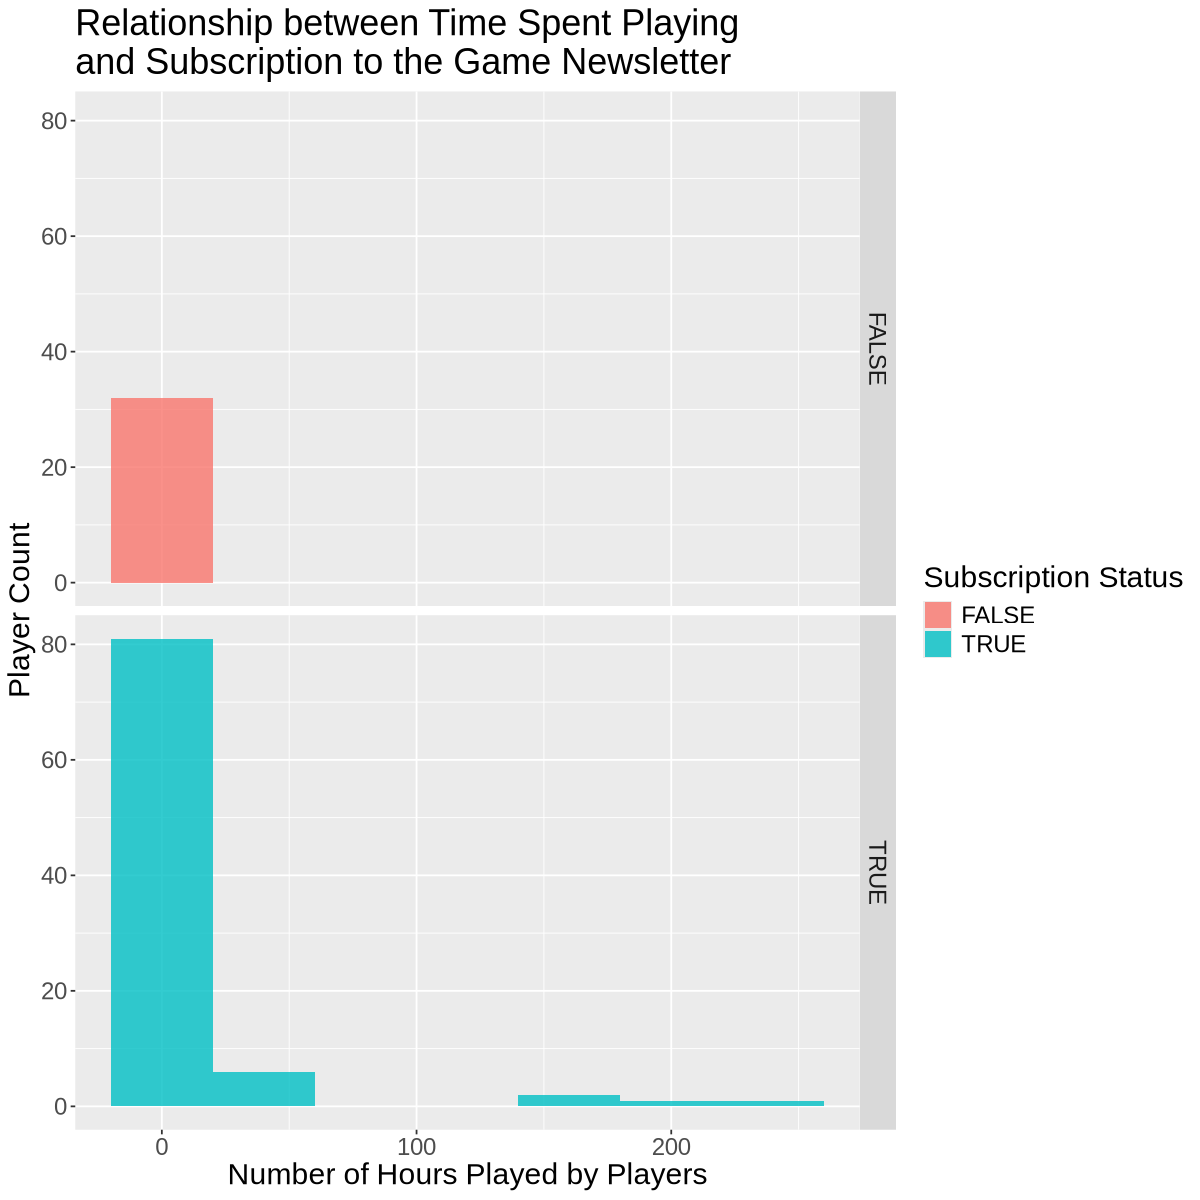

In [107]:
#Histogram showing the players time spent playing and the subscriptions to the game-related newsletter.  
options(repr.plot.width = 10, repr.plot.height = 10)
histogram_1<- players_final_data|>
    ggplot(aes(x= played_hours, fill= as_factor(subscribe)))+
    geom_histogram(binwidth= 40, alpha = 0.8)+
    facet_grid(rows = vars(subscribe)) +
    labs(x="Number of Hours Played by Players",
         y="Player Count",
        title= "Relationship between Time Spent Playing \nand Subscription to the Game Newsletter",
        fill="Subscription Status")+
    theme(text = element_text(size = 18))
histogram_1

There is a large number of players who have played for short amouts of time with only a few who have played for significgantly more hours suggesting an imbalenced distribution. Players with more time spent playing are more likely to subscribe. 

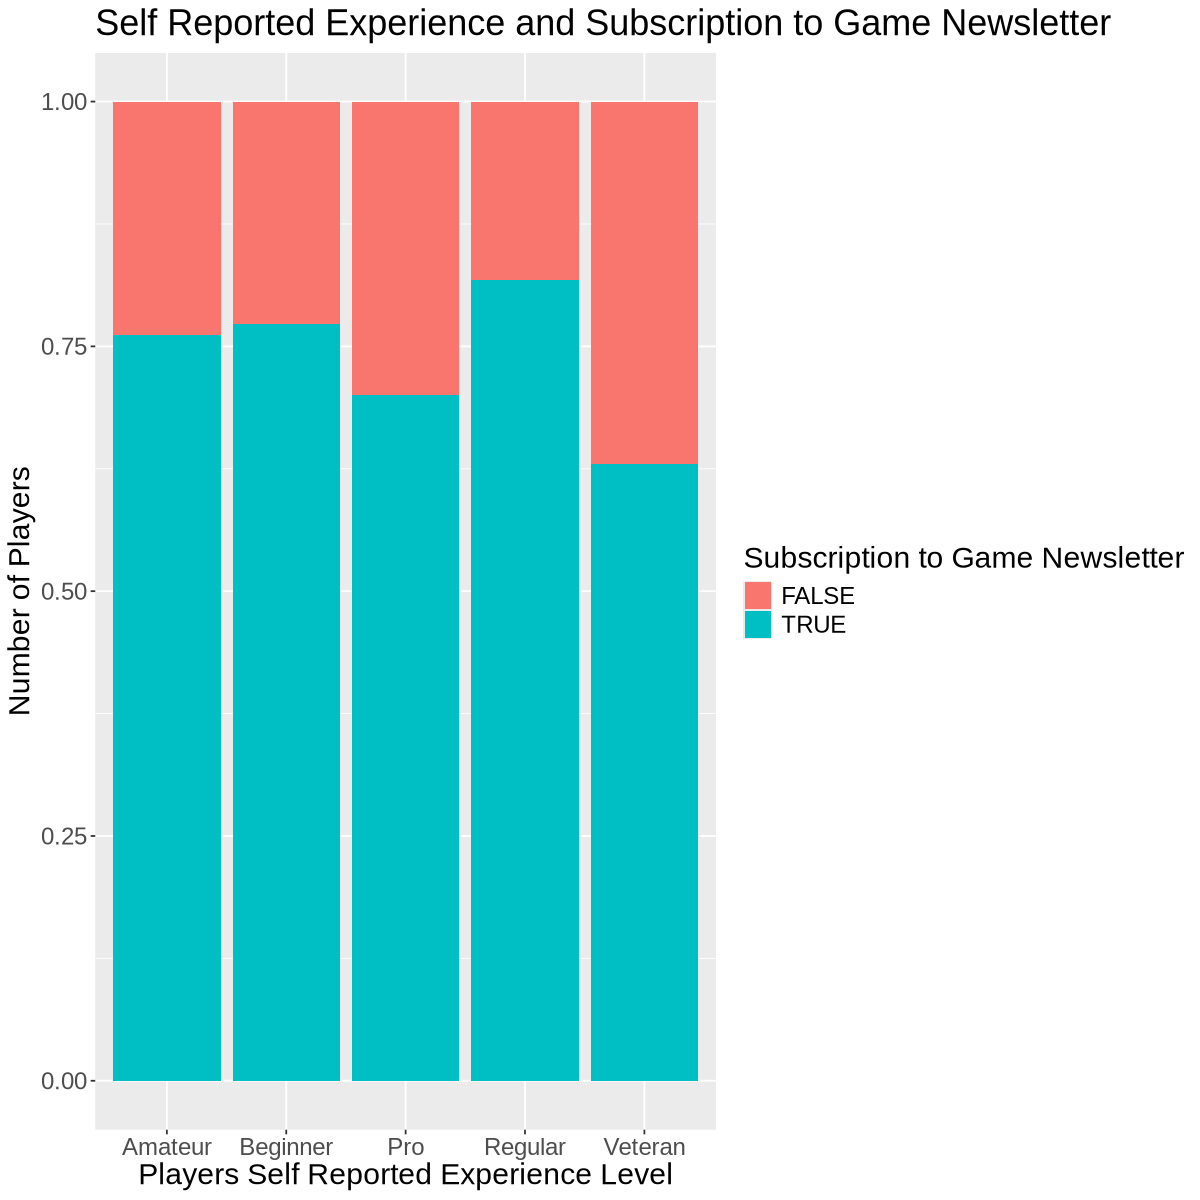

In [108]:
#Bar graph of the ratio of subscriptions between self reported experience levels.
options(repr.plot.width = 10, repr.plot.height = 10)
bar_graph_1<- players_final_data|>
    ggplot(aes(x=experience, fill= subscribe))+
    geom_bar(position="fill")+
    labs(x="Players Self Reported Experience Level",
         y="Number of Players",
        title="Self Reported Experience and Subscription to Game Newsletter",
        fill = "Subscription to Game Newsletter")+
    theme(text = element_text(size = 18))
bar_graph_1

All catagories seem to have at least a 50% subscription rate with the veteran and pro catagories having the largest ratio of non subscribed players and the amateur, beginner and regular players having higher subscription rates. This suggests that newer and less experienced players are more likely to subscribe. 

### Methods and Plan

